## Processing

In [1]:
import os
# 更改环境变量
os.chdir("D:/Ph0Jav7/科研任务/extspider/")

print(os.getcwd())

D:\Ph0Jav7\科研任务\extspider


In [2]:
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from extspider.common.context import DATA_PATH

### 统计Permissions CSV中Permission数量，然后绘制成饼状图。

- 对于Manifest V2，首先排除host_permissiosn，然后再进行统计
- 对于Manifest V3, 直接用permissions列就行

**这里将V2和V3都统计到一起**

接着统计可能会造成Warning的占总声明权限的占比，以及存在Warning权限的扩展占总扩展的多少。


In [10]:
# 首先得到所有被删除的扩展permission信息
from datetime import datetime, timedelta
from extspider.processing.extension_daily_change import get_id_difference_set, extract_data_by_id_set, store_result

CHROME_DAILY_RESULT_PATH = os.path.join(DATA_PATH, "chrome_daily_result")
CHROME_DAILY_PROCESSING = os.path.join(DATA_PATH, "chrome_daily_processing")
date_format = "%Y_%m_%d"

start_date = datetime.strptime('2024_02_29', date_format)
end_date = datetime.strptime('2024_03_10', date_format)

# 对于3.8日的数据不准确，去掉
cat_date = datetime.strptime('2024_03_08', date_format)
date_diff = end_date - start_date

save_file_path = os.path.join(CHROME_DAILY_PROCESSING, "total_deleted.csv")

for day in range(date_diff.days):
 
    f_d = start_date + timedelta(days=day)
    s_d = f_d + timedelta(days=1)

    if f_d == cat_date or s_d == cat_date:
        continue

    f_path = os.path.join(CHROME_DAILY_RESULT_PATH, f"{f_d.strftime(date_format)}_results.csv")
    s_path = os.path.join(CHROME_DAILY_RESULT_PATH, f"{s_d.strftime(date_format)}_results.csv")

    if not os.path.isfile(f_path):
        raise FileNotFoundError("Now day file not found")
    if not os.path.isfile(s_path):
        raise FileNotFoundError("Previous day file not found")
    
    deleted_ids = get_id_difference_set(f_path, s_path)
    deleted_extensions = extract_data_by_id_set(f_path, deleted_ids)
    store_result(save_file_path, deleted_extensions)

120 120
337 337
121 121
86 86
88 88
162 162
78 78
26 26


In [51]:
# 将所有的结果汇聚成一个csv文件列表
import pandas as pd

dataframes = []

CHROME_DAILY_RESULT_PATH = os.path.join(DATA_PATH, "chrome_daily_result")
CHROME_DAILY_PROCESSING = os.path.join(DATA_PATH, "chrome_daily_processing")
date_format = "%Y_%m_%d"

start_date = datetime.strptime('2024_02_29', date_format)
end_date = datetime.strptime('2024_03_10', date_format)

# 对于3.8日的数据不准确，去掉
cat_date = datetime.strptime('2024_03_08', date_format)
date_diff = end_date - start_date

save_file_path = os.path.join(CHROME_DAILY_PROCESSING, "total.csv")

for day in range(date_diff.days):
 
    f_d = start_date + timedelta(days=day)

    if f_d == cat_date:
        continue

    f_path = os.path.join(CHROME_DAILY_RESULT_PATH, f"{f_d.strftime(date_format)}_results.csv")

    if not os.path.isfile(f_path):
        raise FileNotFoundError("Now day file not found")
    
    f_df = pd.read_csv(f_path)
    dataframes.append(f_df)

# 使用concat函数合并所有的DataFrame
merged_df = pd.concat(dataframes, ignore_index=True)

# 删除重复数据行，保留第一个出现的数据行
cleaned_dataframe = merged_df.drop_duplicates(subset=[merged_df.columns[0], merged_df.columns[1]])
cleaned_dataframe.to_csv(save_file_path, index=False)
print('CSV文件合并完成, 输出文件为total.csv')


CSV文件合并完成, 输出文件为total.csv


In [65]:
import os
import ast
import pandas as pd
from collections import Counter
import re

# 定义一个正则表达式来匹配URL
url_pattern = r'(https?)?://[^\s]+'

total_deleted_path = os.path.join(CHROME_DAILY_PROCESSING, 'total_deleted.csv')
# total_deleted_path = os.path.join(CHROME_DAILY_PROCESSING, 'total.csv')
result_df = pd.read_csv(total_deleted_path, usecols=[3])

permissions_counter = Counter()

result_list = result_df.iloc[:, 0]
for row in result_list:
    if not pd.isna(row):
        try:
            # 将字符串表示的列表转换为实际的列表
            permissions = ast.literal_eval(row)
            # 过滤掉列表中的URL
            filtered_permissions = [perm for perm in permissions if not re.search(url_pattern, perm)]
            # 更新Counter对象
            permissions_counter.update(filtered_permissions)
        except Exception as e:
            pass

# 对counter进行降序排序
permissions_counter = sorted(permissions_counter.items(), key=lambda x: x[1], reverse=True)

for perm, count in permissions_counter:
    print(f"{perm}: {count}")

storage: 343
tabs: 210
activeTab: 183
scripting: 95
contextMenus: 58
notifications: 55
webRequest: 39
alarms: 33
downloads: 31
<all_urls>: 29
webNavigation: 29
cookies: 28
desktopCapture: 26
identity: 22
unlimitedStorage: 20
bookmarks: 15
webRequestBlocking: 14
declarativeContent: 13
declarativeNetRequest: 11
proxy: 10
clipboardWrite: 10
management: 9
history: 9
background: 9
identity.email: 9
commands: 6
geolocation: 5
sidePanel: 5
browsingData: 5
nativeMessaging: 5
declarativeNetRequestWithHostAccess: 4
gcm: 4
clipboardRead: 4
privacy: 4
tabCapture: 3
offscreen: 3
webRequestAuthProvider: 3
favicon: 3
system.display: 3
debugger: 3
idle: 2
tts: 2
declarativeNetRequestFeedback: 2
topSites: 2
search: 2
fontSettings: 2
power: 1
pushMessaging: 1
*: 1
host: 1
system.memory: 1
system.cpu: 1
printing: 1


d:\Ph0Jav7\科研任务\extspider\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26435 (\N{CJK UNIFIED IDEOGRAPH-6743}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Ph0Jav7\科研任务\extspider\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38480 (\N{CJK UNIFIED IDEOGRAPH-9650}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Ph0Jav7\科研任务\extspider\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Ph0Jav7\科研任务\extspider\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Ph0Jav7\科研任务\extspider\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39292 (\N{CJK UNIFIED IDEOGRAPH-997C}) missing from current font.
  

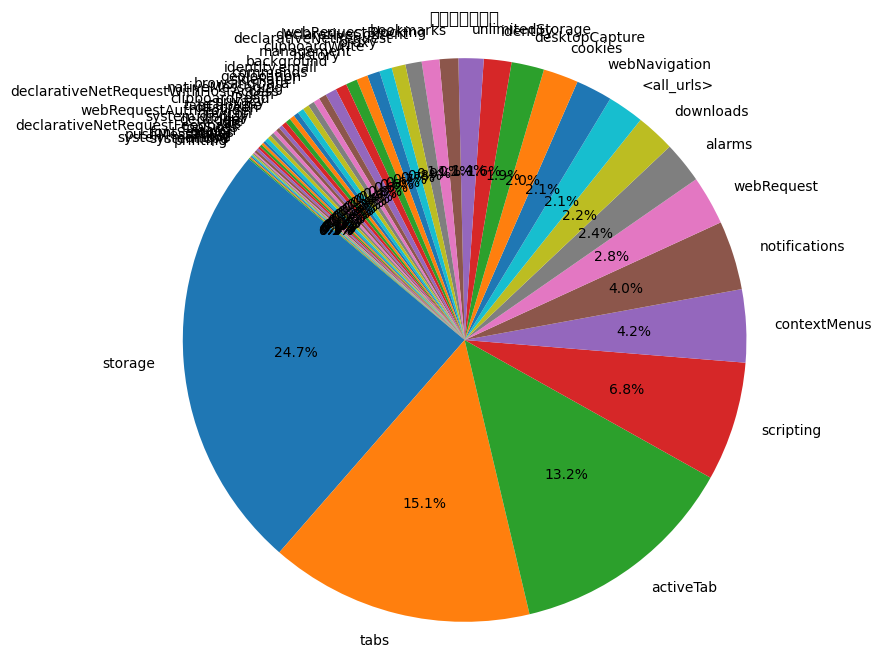

In [66]:
# 绘制饼状图
import matplotlib.pyplot as plt

# 初始化标签和值的列表
labels = []
sizes = []

# 遍历数据迭代器，填充标签和值的列表
for perm, count in permissions_counter:
    labels.append(perm)
    sizes.append(count)

# 使用matplotlib绘制饼状图
plt.figure(figsize=(8, 8))  # 可以调整图表大小
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 保证饼图是圆的
plt.title('权限分布饼状图')
plt.show()

### 获取会产生warning的权限的占比

In [18]:
def daily_manifest_version_counter():
    # CSV 文件路径
    csv_file_path = os.path.join(DATA_PATH,"chrome_daily_processing",
                                 "chrome_daily_v2_v3_change.csv")

    # 使用日期格式
    date_format = "%Y_%m_%d"

    # 初始化数据存储列表
    dates = []
    version2_counts = []
    version3_counts = []

    # 打开并读取 CSV 文件
    with open(csv_file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        for row in csvreader:
            dates.append(datetime.strptime(row[0], date_format))  # 转换日期字符串为 datetime 对象
            version2_counts.append(int(row[1]))  # version3 的个数
            version3_counts.append(int(row[2]))  # version2 的个数

    # 使用matplotlib绘制趋势图
    plt.figure(figsize=(10, 5))  # 设置图的大小
    plt.plot(dates, version2_counts, label='version3', marker='o', linestyle='-')  # 绘制 version3 趋势线
    plt.plot(dates, version3_counts, label='version2', marker='s', linestyle='-')  # 绘制 version2 趋势线

    # 设置标题和标签
    plt.title('Version 2 and Version 3 Counts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')

    # 更好的日期格式化
    formatter = mdates.DateFormatter('%Y-%m-%d')  # 日期显示格式
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.legend()  # 显示图例
    plt.tight_layout()  # 调整布局
    plt.show()  # 显示图形


[datetime.datetime(2024, 3, 1, 0, 0)]
[datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0)]
[datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 1, 0, 0)]
[datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0)]
[datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 3, 0, 0)]
[datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 3, 0, 0), datetime.datetime(2024, 3, 4, 0, 0)]
[datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 1, 0, 0), datetime.datetime(2024, 3, 2, 0, 0), datetime.datetime(2024, 3, 3, 0, 0), datetime.datetime(2024, 3, 4, 0

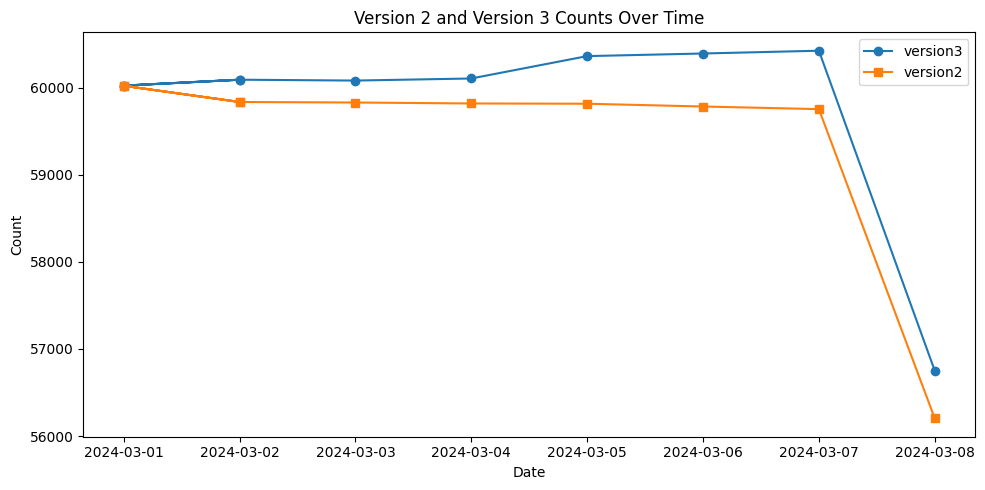

In [15]:
daily_manifest_version_counter()